In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('abalone_csv.csv')

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
#Checking if have some null values for Clean the data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Rings', ylabel='count'>

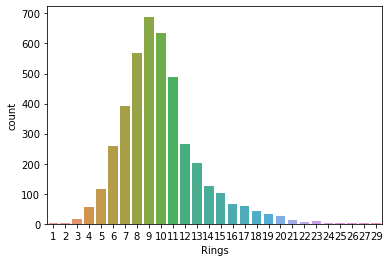

In [7]:
#checking for imbalance
sns.countplot(x="Rings",data=df)

<AxesSubplot:>

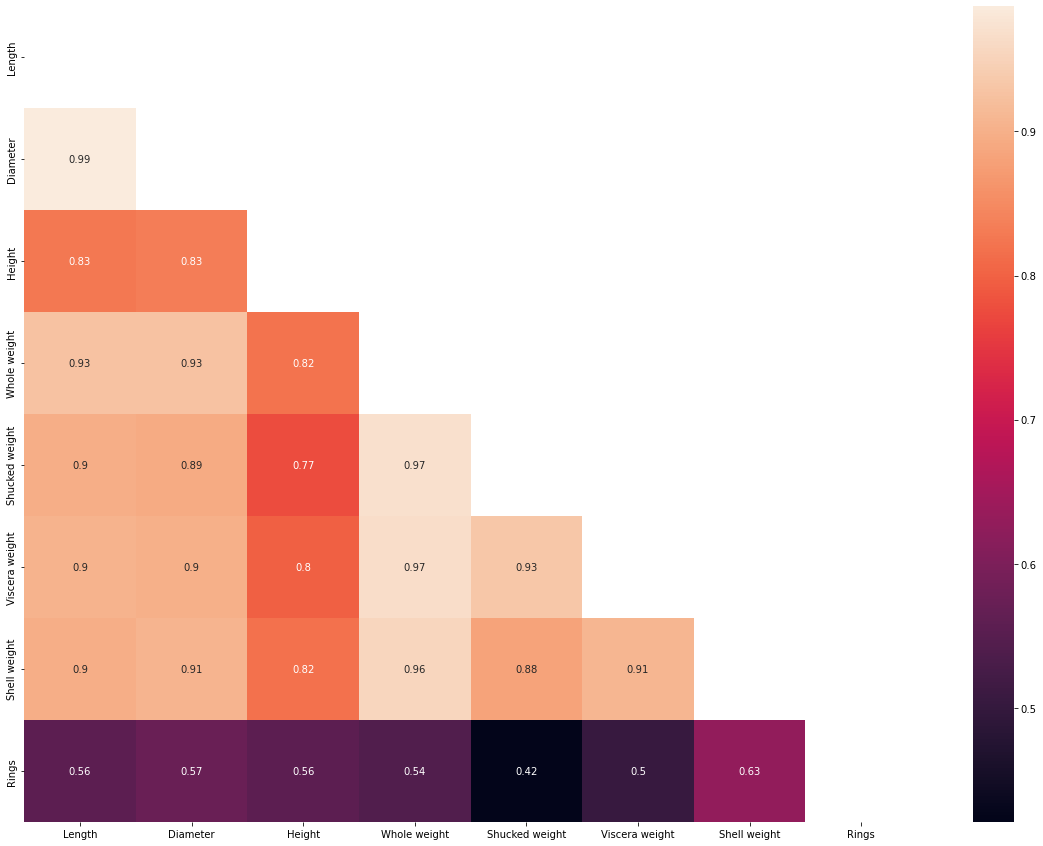

In [8]:
#correlation matrix
plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [9]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Sex'],drop_first=True,prefix="Sex")
# Drop column B as it is now encoded
df = df.drop('Sex',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df 


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


In [10]:
#Split the data to y and x with x is without the class's.
Y = df[['Rings']]
X = df.drop('Rings', axis=1)

In [13]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,0


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
X_train=scaler.fit_transform(X_train)
X=scaler.fit_transform(X_test)

Train set: (3341, 9) (3341, 1)
Test set: (836, 9) (836, 1)


In [15]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.531736 (0.042381)
LASSO: 0.307349 (0.032046)
EN: 0.344095 (0.032339)
KNN: 0.497244 (0.037582)
CART: 0.137244 (0.094187)
GBM: 0.550814 (0.038386)


In [16]:
#defining the objects of linear regression and training with the entire train dataset inputs
linreg=LinearRegression()
#training the model
linreg.fit(X_train,Y_train)
mr = linreg.coef_[0]
cr = linreg.intercept_
print(' y = {0} * x + {1}'.format(mr, cr))

 y = [ 0.05000445  0.97362739  0.38856528  5.14170138 -4.76408523 -1.27159647
  1.06962002 -0.38417094  0.02756914] * x + [9.96348399]


In [17]:
Y_pred = np.round_(linreg.predict(X_test))

In [18]:
from sklearn.metrics import mean_squared_error
import math
rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))

In [19]:
rmse

3.9799136823127568

In [20]:
age=Y_pred+1.5

In [21]:
age

array([[12.5],
       [15.5],
       [14.5],
       [17.5],
       [12.5],
       [13.5],
       [13.5],
       [16.5],
       [15.5],
       [13.5],
       [12.5],
       [12.5],
       [14.5],
       [14.5],
       [14.5],
       [15.5],
       [16.5],
       [13.5],
       [16.5],
       [13.5],
       [14.5],
       [15.5],
       [11.5],
       [14.5],
       [16.5],
       [14.5],
       [14.5],
       [11.5],
       [15.5],
       [15.5],
       [15.5],
       [15.5],
       [13.5],
       [11.5],
       [11.5],
       [14.5],
       [12.5],
       [15.5],
       [14.5],
       [13.5],
       [14.5],
       [15.5],
       [13.5],
       [12.5],
       [15.5],
       [15.5],
       [12.5],
       [12.5],
       [14.5],
       [12.5],
       [12.5],
       [13.5],
       [12.5],
       [15.5],
       [13.5],
       [11.5],
       [16.5],
       [15.5],
       [13.5],
       [13.5],
       [15.5],
       [12.5],
       [14.5],
       [13.5],
       [14.5],
       [13.5],
       [12